In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

# Trasformate di Fourier discrete

## Credits and Rights

Questo notebook è stato realizzato da Agostino Migliore.

## Lista dei simboli usati

FT = trasformata di Fourier (*Fourier transform*)  
DTFT = trasformata di Fourier a tempo discreto (*discrete-time Fourier transform*)  
DFT = trasformata di Fourier discreta (*discrete Fourier Transform*)  
FFT =  trasformata di Fourier veloce (*fast Fourier Transform*)


## 1 Introduzione
Tutta la spettroscopia moderna fa uso delle trasformate di Fourier. Dal momento che l'informazione è aquisita ed elaborata in modo discreto, in realtà vengono usate la DFT e la sua inversa per decomporre i segnali sperimentali (cioè, in realtà, le sequenze di campionamenti discreti dei segnali sperimentali) in serie di componenti di diversa frequenza o a tempi diversi. La FFT è un algoritmo molto efficiente per calcolare le DFT.  
Negli spettrometri a trasformata di Fourier (uno schema è raffigurato nella figura di sotto), i segnali che descrivono l'assorbimento o emissione di radiazione da parte di un campione raggiungono il rivelatore e vengono acquisiti digitalmente. Avviene, quindi, il processamento dei segnali basato sulla DFT, sfruttando l'algoritmo della FFT.  
Inizieremo la nostra analisi con la discussione del concetto di *somma periodica*, che ci porterà a quello di DTFT.

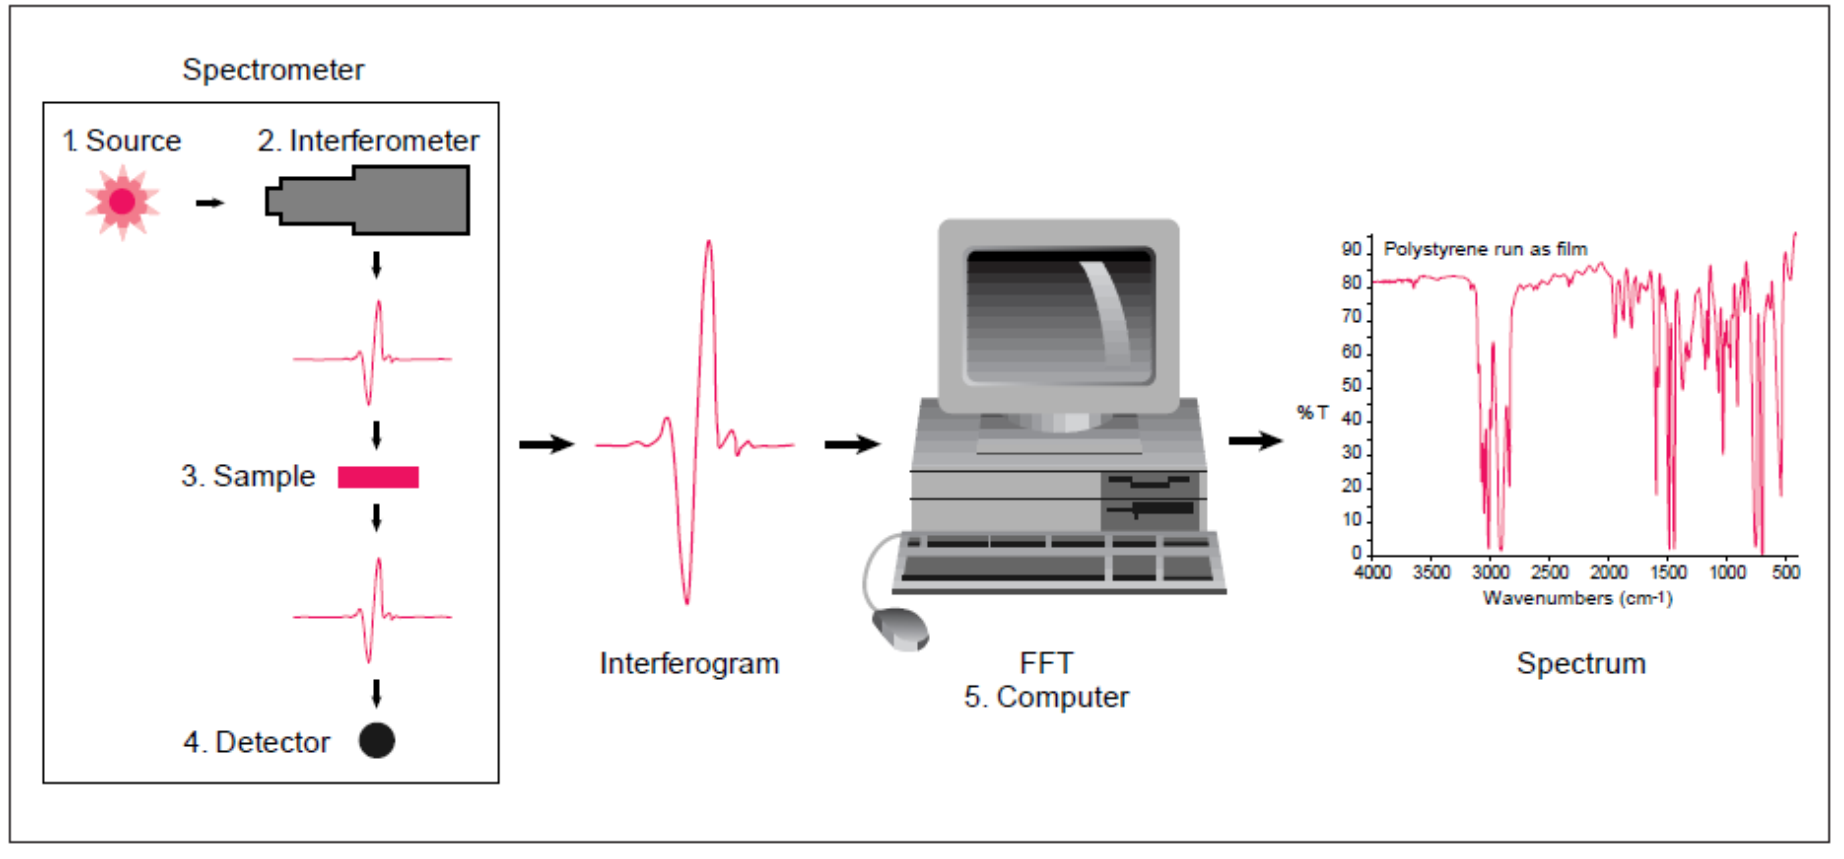
<font size="2">Image from https://www.chem.uci.edu/~dmitryf/manuals/Fundamentals/FTIR%20principles.pdf</font>

## 2 Somma periodica

Data una funzione (un segnale) generalmente non periodica $s(t)$, si possono facilmente definire due funzioni periodiche strettamente connesse a quella data. Una è, come visto nella lezione precedente, la funzione periodica con le seguenti proprietà
$$
\begin{cases}
s_\mathrm{T}(t) = s(t) \quad -\frac{\mathrm{T}}{2} \le t \le \frac{\mathrm{T}}{2} \\[3pt]
s_\mathrm{T}(t) = s_\mathrm{T}(t+\mathrm{T})
\end{cases} \tag{1}
$$
Questo significa che la funzione periodica è definita come segue:
$$
s_\mathrm{T}(t)=
\begin{cases}
s_\mathrm{T}(t+\mathrm{T}) && t < -\frac{\mathrm{T}}{2} \\[3pt]
s(t) && -\frac{\mathrm{T}}{2} \le t \le\ \frac{\mathrm{T}}{2} \\[3pt]
s_\mathrm{T}(t-\mathrm{T}) && t > \frac{\mathrm{T}}{2}
\end{cases} \tag{2}
$$
Un'altra funzione periodica strettamente connessa a quella data è la cosiddetta <span style="color:blue">somma periodica</span>
$$
 S_\mathrm{T}(t)=\sum_{j=-\infty}^{\infty} s(t+j\mathrm{T}) \tag{3}
$$
Le due formulazioni coincidono se $s(t)$ è nulla fuori dall'intervallo $\left[ -\frac{\mathrm{T}}{2},\frac{\mathrm{T}}{2} \right]$, come è mostrato nell'esempio della figura di sotto.

<pass/> <div align="center">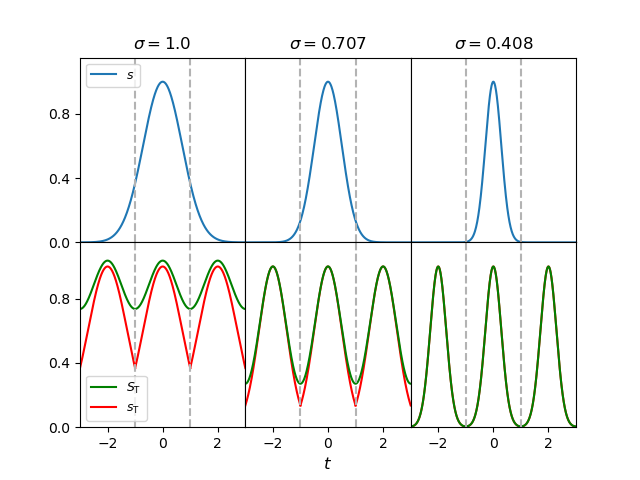</div>
<br>

## 3 DTFT

Quest'ultima formulazione di funzione periodica è molto usata in FFT e la studieremo qui in maggior dettaglio. Iniziamo col considerare la sua serie di Fourier, adottando una notazione simile a quella usata nelle lezioni precedenti in termini di tempo e frequenza (l'equazione seguente mostra varie notazioni equivalenti):
$$
\begin{align}
 S_\text{T}(t) &= \sum_{n=-\infty}^{\infty} c_n e^{i2\pi\frac{n}{\text{T}}t} 
 = \sum_{n=-\infty}^{\infty} c_n e^{i\omega_n t} 
 = \sum_{n=-\infty}^{\infty} c_n e^{i2\pi\nu_n t} \notag \\[3pt] 
 &= \sum_{n=-\infty}^{\infty} \frac{\mathrm{\tilde{S}}_n}{\text{T}} e^{i2\pi\frac{n}{\text{T}}t} 
 = \sum_{n=-\infty}^{\infty} \frac{\mathrm{\tilde{S}}(\nu_n)}{\text{T}} e^{i2\pi\nu_n t} \notag
 \end{align}
 \tag{4}
$$
\
dove (si noti che l'integrazione di sotto si può equivalentemente effettuata tra $0$ e $\text{T}$)  
\
$$
 c_n = \frac{\mathrm{\tilde{S}}_n}{\text{T}} = \frac{1}{\text{T}} \int_{-\frac{\text{T}}{2}}^\frac{\text{T}}{2} 
 S_\mathrm{T}(t) e^{-i2\pi\frac{n}{\text{T}}t} dt
 = \frac{1}{\text{T}} \int_{-\frac{\text{T}}{2}}^\frac{\text{T}}{2} \sum_{j=-\infty}^{\infty} 
 s(t+j\mathrm{T})\, e^{-i2\pi\frac{n}{\text{T}}t} dt \tag{5}
$$
\
Adesso effetuiamo il cambiamento di variabile $u = t + j\text{T}$, da cui $\frac{t}{\text{T}} = \frac{u}{\text{T}} - j$ e quindi $e^{-i2\pi\frac{n}{\text{T}}t} = e^{-i2\pi\frac{n}{\text{T}}u} e^{-i n j 2\pi} = e^{-i2\pi\frac{n}{\text{T}}u}$. Inoltre, l'intervallo d'integrazione cambia da $\left[-\frac{\text{T}}{2},\frac{\text{T}}{2}\right]$ a $\left[\left(j-\frac{1}{2}\right)\text{T},\left(j+\frac{1}{2}\right)\text{T}\right]$. A questo punto, l'equazione (5) si può riscrivere nella forma  
\
$$
 \mathrm{\tilde{S}}_n = \sum_{j=-\infty}^{\infty} \int_{\left(j-\frac{1}{2}\right)\text{T}}^{\left(j+\frac{1}{2}\right)\text{T}} 
 s(u)\, e^{-i2\pi\frac{n}{\text{T}}u} du
 = \int_{-\infty}^{\infty} s(u)\, e^{-i2\pi\nu_n u} du = \tilde{s}(\nu_n) \tag{6}
$$
\
cioè
\
$$
\mathrm{\tilde{S}}_n = \tilde{s}(\nu_n) \tag{7}
$$
\
Considerato che $\nu_n = \frac{n}{\text{T}}$ e quindi la separazione tra due qualsiasi frequenze consecutive nella serie di Fourier è $\Delta\nu = \nu_{n+1} - \nu_n = \frac{1}{\text{T}}$, l'equazione (7) significa, essenzialmente, che i coefficienti della serie di Fourier della funzione <span style="color:blue">somma periodica</span> sono uguali ai valori della trasformata di Fourier (*continua*) del segnale di partenza $s(t)$ ad intervalli $\Delta\nu = \frac{1}{\text{T}}$. In altre parole, la distribuzione dei coefficienti della serie di Fourier di $S_\text{T}(t)$ rappresenta una discretizzazione della trasformata di Fourier di $s(t)$, come mostrato sotto.

<pass/> <div align="center">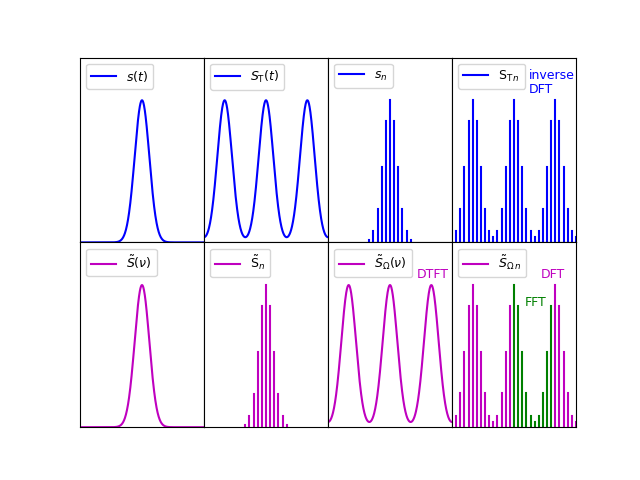</div>

Come esempio, nella prima colonna di tale figura mostro un segnale $s(t)$ che è funzione Gaussiana e la sua trasformata di Fourier $\tilde{s}(\nu_n)$, che è pure una Gaussiana. Le due curve sono chiaramente rappresentate su scale diverse. Nella seconda colonna riporto la funzione periodica $S_\text{T}(t)$ e la sua serie di Fourier (per essere più precisi, le componenti o coefficienti $\mathrm{\tilde{S}}_n$ di tale serie), che è legata a $S_\text{T}(t)$ dalla relazione (7). Si noti che tale tipo di rappresentazione non è fattibile in generale, in quanto i coefficienti sono in genere numeri complessi.

La prima figura nella terza colonna rappresenta una discretizzazione $s_n$ di $s(t)$, ottenuta campionando il segnale ad intervalli di tempo regolari, come avviene usualmente in realtà nel mondo digitale. Dalla relazione di reciprocità tra una funzione (che è la <span style="color:blue">anti-trasformata di Fourier</span> o <span style="color:blue">trasformata di Fourier inversa</span>) e la sua trasformata di Fourier, paragonando con i risultati analitici di sopra e la loro rappresentazione nella seconda colonna, si arguisce immediatamente che $s_n$ è l'antitrasformata di Fourier della funzione $\tilde{S}_{\mathrm{\Omega}}(\nu)$, che è la somma periodica della trasformata di Fourier $\tilde{s}(\nu)$ del segnale (continuo):
$$
 \tilde{S}_\mathrm{\Omega}(\nu) = \sum_{j=-\infty}^{\infty} \tilde{s}(\nu+j\mathrm{\Omega}) \tag{8}
$$
dove il periodo $\Omega$ di $\tilde{S}_\mathrm{\Omega}(\nu)$ è l'inverso dell'intervallo $\tau$, assunto costante, tra due campionamenti successivi del segnale:
$$
\Omega = \frac{1}{\mathrm{\tau}} \tag{9}
$$
$\tilde{S}_{\mathrm{\Omega}}(\nu)$ è il risultato dell'operazione di trasformata effettuata su dati discreti (<span style="color:red">DTFT</span>).  
<span style="color:darkcyan">La DTFT è di per sé una funzione continua della frequenza. La sua anti-trasformata è la sequenza di valori $s_n$ del segnale campionato.</span> Sotto opportune condizioni, si può ricavare esattamente il segnale continuo $s(t)$ a partire dalla DTFT. 

## 4 DFT e FFT

<span style="color:darkcyan">La</span> <span style="color:red">DFT</span> <span style="color:darkcyan">è la forma discretizzata della trasformata di Fourier del segnale campionato in ingresso</span> (l'anti-trasformata della DFT è una somma periodica, come vedremo, del segnale discreto in ingresso). Di conseguenza, mentre la DTFT calcola una trasformata di Fourier continua a partire dai campioni del segnale, nel caso della DFT anche la trasformata è discreta.  
La DFT si presta, in modo ideale, all'analisi di informazioni (per esempio, lo spettro di una sostanza a partire dal segnale di assorbimento o emissione) per mezzo di un computer. In generale, la DFT è ampiamente usata nell'elaborazione numerica di segnali per analizzare le frequenze contenute in un egnale, per risolvere equazioni differenziali alle derivate parziali che emergono da problemi di chimica, fisica e ingegneria, in teoria dell'inforamzione, per calcolare convoluzioni e moltiplicare numeri interi molto grandi. In tutti questi utilizzi si sfrutta una formulazione molto efficiente della DFT: la <span style="color:red">FFT</span>.

Partendo dal segnale $s(t)$ e dalla sua FT $\tilde{S}(\nu)$, che sono entrambe funzioni continue di una variabile continua, vogliamo:

* realizzare una versione discreta di $s(t)$ che fornisca una ragionevole approssimazione al segnale continuo;
* realizzare una discretizzazione di $\tilde{S}(\nu)$ che ne rappresenti una ragionevole approssimazione;
* trovare un modo di connettere le versioni discrete della funzione e della sua FT che sia una ragionevole approssimazione al modo in cui le corrispondenti funzioni continue sono connesse.

Per semplificare la discussione assumiamo (anche se non è essenziale per pervenire alle medesime conclusioni generali) che $s(t)$ sia un segnale di durata finita e sia quindi zero al di fuori di un intervallo $[0,\text{T}]$ (per esempio, questo è vero con eccellente approssimazione, per la funzione Gaussiana considerata prima, purché $\text{T}$ sia sufficientemente più grande del parametro di larghezza della Gaussiana). Supponiamo pure che la FT sia zero, o comunque approssimativamente zero, fuori da un intervallo di frequenza $[0,\mathrm{\Omega}]$. Si noti che potremmo definire l'intervallo di tempo come $[-\frac{\text{T}}{2},\frac{\text{T}}{2}]$ e quello delle frequenze come $\left[-\frac{\mathrm{\Omega}}{2},\frac{\mathrm{\Omega}}{2}\right]$ in conformità alle scelte di sopra, ma ciò è inessenziale e la presente scelta semplifica la notazione passando all'analisi discreta.

Secondo il <span style="color:blue">teorema del campionamento di Nyquist</span>, si evita l'erronea identificazione di frequenze di un segnale, quindi l'introduzione di distorsioni o errori, se la frequenza di campionamento è almeno il doppio della larghezza di banda (*bandwidth*) del segnale. Scegliendo la frequenza di campionamento minima per soddisfare tale teorema, il numero di campionamenti del segnale, $N$, deve soddisfare l'uguaglianza $\frac{1}{\tau} = \frac{N}{\text{T}} = 2\frac{\mathrm{\Omega}}{2} = \mathrm{\Omega}$, che implica
$$
N = \frac{\text{T}}{\tau} = \mathrm{\Omega} \text{T} \tag{10}
$$
o deve comunque essere il numero intero immediatamente più grande del prodotto al secondo membro. Gli $N$ instanti in cui si campiona il segnale sono dati da
$$
t_n = n\tau, \;\;\;\; n \in [0,N-1] \tag{11}
$$
Usando la notazione abbreviata $\{t_n\}_{n = 0, 1, N - 1} = \{t_n\}$ per il set di tali tempi di campionamento e una notazione simile per il corrispondente set di valori del segnale $\{s_n\}$, scriviamo
$$
s_\text{d}(t) =
\begin{cases}
\{s_n\}  && t \in \{t_n\} \\[3pt]
0 && t \notin \{t_n\} \tag{12}
\end{cases}
$$
In realtà, una rappresentazione matematica più conveniente del segnale discreto è la seguente:
$$
 s_\text{d}(t) = \sum_{n=0}^{N-1} s({t_n})\delta(t - t_n)
 \equiv \sum_{n=0}^{N-1} s_n\delta(t - t_n) \tag{13}
$$
Mentre ciascun campionamento reale del segnale impiega un tempo finito e fornisce un valore $s_n$ che è in effetti una media del segnale nel breve intervallo di tempo del campionamento, si può immaginare che le misurazioni siano praticamente instantanee, il che corrisponde alla rappresentazione in termini di delta di Dirac nell'equazione (13). La trasformata di Fourier (continua) della (13) è  
$$
 \tilde{s}_\text{d}(\nu) = \sum_{n=0}^{N-1} s_n\int_{-\infty}^{\infty} \delta(t - t_n)\, e^{-i2\pi\nu t} dt 
 = \sum_{n=0}^{N-1} s_n e^{-i2\pi\nu t_n} \tag{14}
$$
Si noti che, per un numero sufficientemente grande di $N$, la (14) ha praticamente la forma della serie di Fourier (4) (a parte il modo in cui si è indicizzata la sommatoria, che si può facilmente dimostrare essere irrilevante), con i ruoli di tempo e frequenza invertiti. I coefficienti della serie sono i valori misurati del segnale.

Per pervenire alla DFT, adesso consideriamo le cose dal punton di vista del dominio delle frequenze. Il fatto che la funzione $s(t)$ sia limitata all'intervallo $[0,\text{T}]$ determina la frequenza di campionamento per la costruzione della trasformata di Fourier discreta a partire dai suoi campionamenti nel dominio delle frequenze. Infatti, l'analogo della (10) è
$$
N_\nu = \frac{\mathrm{\Omega}}{\Delta\nu} = \mathrm{\Omega} \text{T} = N \tag{15}
$$
cioè lo stesso numero di campionamenti del segnale. Le frequenze sono, quindi,
$$
\nu_k = k\Delta\nu = \frac{k}{\text{T}} = \frac{k}{N\tau}, \;\;\;\; k \in [0,N-1] \tag{16}
$$
(si noti che qui $k$ è semplicemente un indice discreto, come $n$, non una componente del vettore d'onda come nella lezione precedente). <span style="color:darkcyan">La DFT non è definita come la FT del segnale continuo, $\tilde{s}(\nu)$, valutata a tali frequenze discrete; essa è invece la FT del signale discreto, $\tilde{s}_\text{d}(\nu)$ valutata alle frequenze discrete</span>, cioè il set di valori $\{{\tilde{s}_\text{d}}(\nu_n)\} \equiv \{\xi_n\}$ dato da
$$
 \xi_k = \sum_{n=0}^{N-1} s_n e^{-i2\pi\nu_k t_n} = \sum_{n=0}^{N-1} s_n e^{-i2\pi\frac{k}{N\tau} n\tau} 
 = \sum_{n=0}^{N-1} s_n e^{-i2\pi\frac{k}{N} n} \tag{17}
$$
cioè
$$
 \xi_k = \sum_{n=0}^{N-1} s_n e^{-i2\pi\frac{k}{N} n} \;\;\;\; k = 0, 1, ..., N-1 \tag{18}
$$
Vediamo, infine, come la la FT del segnale continuo, $\tilde{s}(\nu)$, valutata alla frequenza $\nu_k = \frac{k}{N\tau}$ è connessa alla DFT, facendo uso della relazione fra $\tau$ e $\mathrm{\Omega}$ introdotta prima dell'equazione (10):
$$
 \tilde{s}(\nu_k) = \int_{-0}^\text{T} s(t)\, e^{-i2\pi\nu_k t} dt \approx \sum_{n=0}^{N-1} s_n e^{-i2\pi\nu_k t_n} \tau
 = \frac{1}{\mathrm{\Omega}} \xi_k \tag{19}
$$
Di conseguenza, a parte il fattore comune $1/\mathrm{\Omega}$, la quantità $\xi_k$ costituisce un'approssimazione alla FT del segnale alla medesima frequenza, $\tilde{s}(\nu_k)$, che è tanto migliore quanto più fitto è il campionamento del segnale e quindi migliore l'approssimazione dell'integrale nella (19).  
In effetti l'approssimazione dell'integrale che definisce $\tilde{s}(\nu_k)$ con la <span style="color:blue">somma di Riemann</span>, cioè la discretizzazione dell'integrale, è un altro modo per pervenire all'espressione della DFT.  

Si noti che il segnale $s(t)$ può anche essere una funzione complessa, anche se spesso si tratta di un segnale reale. Anche in tal caso, i valori della DFT coinvolgono esponenziali complesse e sono, in generale, complessi.

Notiamo un altro fatto importante che vien fuori dalla discretizzazione. Abbiamo già visto che una FT in generale non definisce una funzione periodica (a meno che non si possa ridurre a una serie di Fourier), mentre una serie di Fourier definisce una funzione periodica. Lo stesso vale, chiaramente, per una somma finita di Fourier, come quella che definisce la DFT, essendo una sovrapposizione di termini periodici.  
La quantità nell'equazione (18) può, di per sé, essere valutata per qualsiasi $k$ ed è periodica di periodo $N$. Infatti, considerando un qualsiasi multiplo di $N$, $mN$, si ha:
$$
 \xi_{k+mN} = \sum_{n=0}^{N-1} s_n e^{-i2\pi\frac{k+mN}{N} n} = \sum_{n=0}^{N-1} s_n e^{-i2\pi\frac{k}{N} n} e^{-i2\pi mn} 
 = \sum_{n=0}^{N-1} s_n e^{-i2\pi\frac{k}{N} n} = \xi_k \tag{20}
$$
<span style="color:darkcyan">Si può quindi (ed è conveniente) estendere la definizione della DFT, considerandola una sequenza periodica di periodo $N$ definita dalla (18) all'interno del periodo fondamentale.</span> Con tale estensione, la DFT descrive la trasformata di Fourier a tempo discreto di una sequenza di valori infinita con periodo $N$. Infatti, si può facilmente dimostrare che, per una sequenza periodica di dati, la DTFT discussa sopra contiene solo componenti a frequenze discrete.  
Una volta fatto quanto sopra, emerge che anche la sequenza di campioni del segnale, che funziona da input al calcolo della DFT, si estende naturalmente ad una sequenza di periodo $N$. In ogni caso, la relazione col segnale iniziale rimane ben definita.  

Considerare la DFT e il segnale discreto (ovvero la DFT inversa) periodici ha vantaggi matematici (per esempio, consente l'uso del teorema di convoluzione) che si traducono in importanti vantaggi applicativi, per esempio in spettroscopia e in teoria dell'informazione.
A questo punto, concludiamo l'analisi teorica con un breve cenno al principale algoritmo di FFT usato per velocizzare il calcolo della DFT e della DFT inversa.

## 5 FFT

L'approccio di FFT di gran lunga più usato è l'<span style="color:blue">algoritmo di Cooley-Tukey</span> (anche se, in realtà, si dovrebbe chiamare l'<span style="color:blue">algoritmo di Gauss</span>) e, in particolare, la sua versione chiamata <span style="color:blue">*radix-2 decimation-in-time*</span>. Nel metodo della DFT il numero di operazioni effettuato è dell'ordine di $N^2$, dal momento che si hanno $N$ dati di input e, per ciascuno di essi, $N$ valori calcolati di DFT. La FFT spezza una DFT per $N$ punti in DFT per $N_1$ e $N_2$ punti con $N = N_1 N_2$ in modo ricorsivo e riutilizza risultati intermedi della computazione in modo tale da ridurre il numero di operazioni necessarie a qualcosa dell'ordine di $N\log(N)$. Si noti che $\log(N)$ cresce molto più lentamente di $N$. Infatti, $N/\log(N) \rightarrow \infty$ per $N \rightarrow \infty$ (vedi sotto).

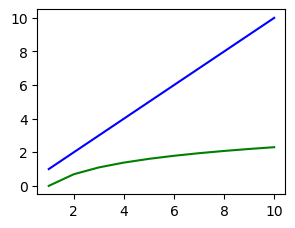

In [41]:
x = np.arange(1,11, 1)
y = np.log(x)
plt.figure(figsize=(3.2,2.4))
plt.plot(x,x,'b',x,y,'g')
plt.show()

Nella (18), scindiamo la sommatoria in due sommatorie sui termini di indice pari e quelli di indice dispari: 
$$
 \begin{align}
 \xi_k &= \sum_{m=0}^{N/2-1} s_{2m} e^{-i2\pi\frac{k}{N} 2m} + \sum_{m=0}^{N/2-1} s_{2m+1} e^{-i2\pi\frac{k}{N} (2m+1)} \\[4pt] 
 &= \sum_{m=0}^{N/2-1} s_{2m} e^{-i2\pi\frac{k}{N/2} m} + e^{-i2\pi\frac{k}{N}}\sum_{m=0}^{N/2-1} s_{2m+1} e^{-i2\pi\frac{k}{N/2} m} \\[4pt]
 &= P_k + e^{-i2\pi\frac{k}{N}} D_k
 \end{align} \;\;\;\;\;\;\;\;\;\; k = 0, 1, ..., \frac{N}{2}-1
 \tag{21}
$$
Nell'ultima riga dell'equazione (21) abbiamo denotato con le lettere $P$ e $D$ le sommatorie sui termini rispettivamente di indice pari e dispari. Usando la ben nota proprietà $e^{A+B} = e^Ae^B$ è facile vedere che
$$
 \xi_{k+\frac{N}{2}} = P_k - e^{-i2\pi\frac{k}{N}} D_k \tag{22}
$$
Senza entrare in ulteriori dettagli, l'approccio consiste nell'usare le relazioni (21) e (22) e, come detto prima, nel riutilizzare i risultati di calcoli intermedi per computare la DFT e la DFT inversa.

Per calcolare le FFT, si possono usare direttamente le funzioni disponibili in <span style="color:blue">SciPy</span>. A tal fine, importiamo le funzioni del modulo <span style="color:blue">fft</span> di SciPy che consentono di effettuare la DFT (il nome della funzione è <span style="color:blue">fft</span>; quindi si tratta di <span style="color:blue">scipy.fft.fft</span>) e la DFT inversa (<span style="color:blue">ifft</span>) di funzioni di una variabile. Inoltre, importiamo la funzione <span style="color:blue">fftfreq</span>, che riceve come argomenti di input primari il numero di campionamenti e la loro separazione temporale e calcola conseguentemente i valori di frequenza campionati forniti come output.

In [23]:
from scipy.fft import fft, ifft, fftfreq

## Esempio
Calcoliamo e plottiamo la FFT della somma di due seni.

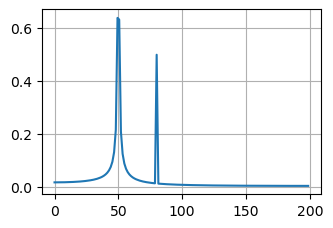

In [46]:
# Numero di valori del segnale di ingresso da campionare:
N = 300
# Spaziatura dei campioni (tau):
t = 1.0 / 400.0
x = np.linspace(0.0, N*t, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, t)[0:N//2]
import matplotlib.pyplot as plt
plt.figure(figsize=(3.6,2.4))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Dal momento che il segnale è reale, lo spettro è simmetrico, in quanto i valori della DFT (calcolata con un approccio FFT) in corrispondenza delle frequence positive sono i complessi coniugati di quelli in corrispondenza delle frequenze negative. In un caso come questo, di solito si grafica solo la parte di FFT corrispondente alle frequenze positive, che è la scelta fatta sopra. Si noti, inoltre, che sono mostrati i valori assoluti delle componenti spettrali moltiplicati per il fattore necessario per ottenere lo spettro vero e proprio a partire dalla DFT visto nell'analisi teorica di sopra.

## Esercizio
Considerate il segnale contenuto nel file "pulse.dat" della sottocartella "dati (data files)" della cartella "Parte 1: Introduzione al Coding in Python" nel sito https://stem.elearning.unipd.it/. La figura di sotto mostra la curva che interpola le misure del segnale, che costituiscono in realtà un set discreto ed equispaziato di campionamenti, come si può vedere dal file di dati. Usando tali dati,

* Create un semplice codice che legga i dati dal file e usi l'equazione (18) per ottenere la DFT del segnale e poi lo rappresenti opportunamente in un grafico. Se volete (ma non è essenziale), potete troncare il set di dati per renderlo simmetrico.
* Effettuate la FFT con una funzione di SciPy e confrontate il risultato con quello ottenuto usando il vostro codice.

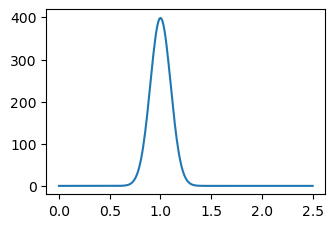

In [47]:
t = []
P = []
n = 0

with open("MCC_data/pulse.dat","r") as f:
    for line in f:
        sl = line.split() # suddivide la riga in corrispondenza degli spazi,
                          # generando un array di due elementi
        t.append(float(sl[0]))
        P.append(float(sl[1]))
        n += 1

plt.figure(figsize=(3.6,2.4))
plt.plot(t,P)
plt.show()